In [4]:
%config IPCompleter.greedy=True
import numpy as np
import h5py
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib
import matplotlib.pyplot as plt
from tensorflow import keras

In [5]:
tf.__version__

'2.1.0'

# Deep Learning - Assignement 2 - Part A

#### R00183247 - Adam Zebrowski

In [6]:
def loadDataH5():
    with h5py.File('data/data1.h5','r') as hf: 
        trainX = np.array(hf.get('trainX')) 
        trainY = np.array(hf.get('trainY')) 
        valX = np.array(hf.get('valX')) 
        valY = np.array(hf.get('valY')) 
        print (trainX.shape,trainY.shape) 
        print (valX.shape,valY.shape)
    return trainX, trainY, valX, valY
trainX, trainY, testX, testY = loadDataH5()



(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)


In [7]:
NUM_EPOCHS = 25
WIDTH = trainX.shape[2]
HEIGHT = trainX.shape[1]
CLASSES = 17
DEPTH = trainX.shape[3]
BATCH_SIZE = 16


In [8]:
def visualiseOutput(history):
    
    print("\n")
    print("Min Val Loss: ", min(history.history['val_loss']))
    print("Max Val Accuracy: ", max(history.history['val_accuracy']))
    print("\n")
    
    
    plt.figure(figsize=(20,10))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
   
    plt.title('Training Loss and Accuracy')
    plt.ylabel('Loss/Accuracy')
    plt.xlabel('Epoch #')
    plt.legend(['train loss', 'val loss', 'train acc', 'val acc'], loc='upper right')
    plt.show()

In [12]:

def executeModel(model):
    opt = keras.optimizers.SGD(lr=0.01)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    h = model.fit(trainX, trainY, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testX, testY), verbose=1)
    visualiseOutput(h)
    return

#### Part i
Implement a baseline CNN, which contains just a single convolutional layer, single pooling layer, fully connected layer and softmax layer.
Increase the number of layers in your CNN (the number of convolutional and pooling layers). 
You should implement at least three different CNN configurations (not including the baseline). In your report show the impact on the validation and training accuracy/loss values (inclusive of the baseline case). 
Compare and contrast the performance of your models in your report.


In [13]:

def singleLayers():
    inputShape = (HEIGHT, WIDTH, DEPTH)
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))

    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1000,activation='relu'))
    model.add(keras.layers.Dense(CLASSES, activation='softmax'))
    return model

Train on 1020 samples, validate on 340 samples
Epoch 1/25
1020/1020 [==============================] - 47s 46ms/sample - loss: 2.5709 - accuracy: 0.1706 - val_loss: 2.1395 - val_accuracy: 0.3294
Epoch 2/25
1020/1020 [==============================] - 46s 45ms/sample - loss: 2.0219 - accuracy: 0.3255 - val_loss: 1.8343 - val_accuracy: 0.4353
Epoch 3/25
1020/1020 [==============================] - 46s 45ms/sample - loss: 1.7190 - accuracy: 0.4176 - val_loss: 1.8378 - val_accuracy: 0.3324
Epoch 4/25
1020/1020 [==============================] - 46s 45ms/sample - loss: 1.4737 - accuracy: 0.5157 - val_loss: 1.8539 - val_accuracy: 0.3794
Epoch 5/25
1020/1020 [==============================] - 46s 45ms/sample - loss: 1.2345 - accuracy: 0.5961 - val_loss: 1.7058 - val_accuracy: 0.4176
Epoch 6/25
1020/1020 [==============================] - 47s 46ms/sample - loss: 1.0478 - accuracy: 0.6833 - val_loss: 1.5745 - val_accuracy: 0.4676
Epoch 7/25
1020/1020 [==============================] - 46s 45ms/

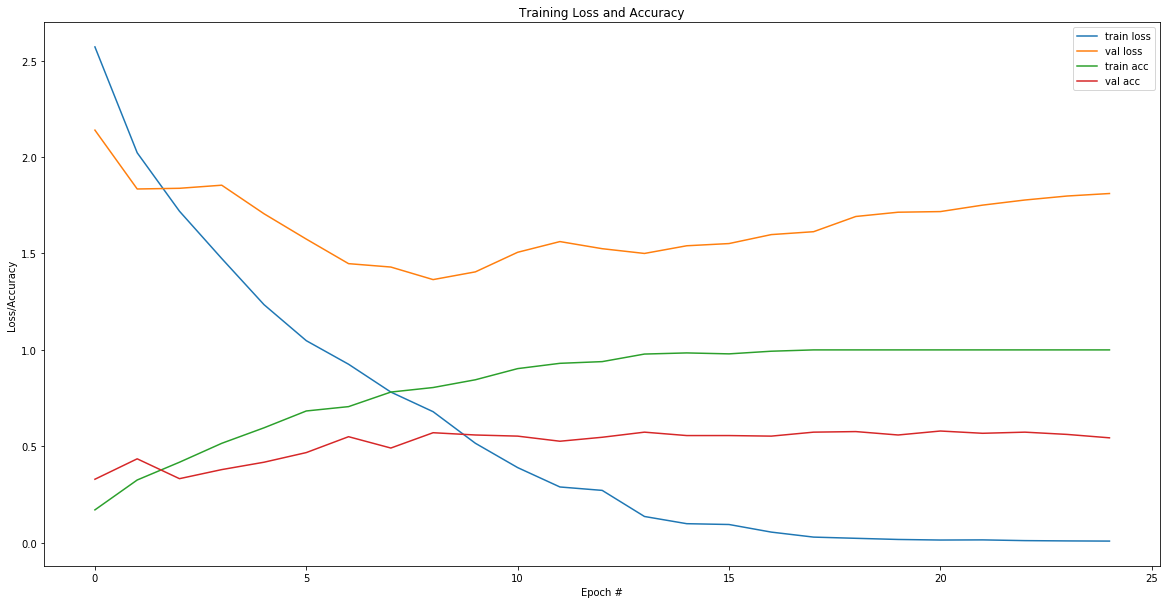

In [14]:
model = singleLayers()
executeModel(model)

In [ ]:
def deeper1():
    inputShape = (HEIGHT, WIDTH, DEPTH)
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))

    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))

    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1000,activation='relu'))
    model.add(keras.layers.Dense(CLASSES, activation='softmax'))
    return model

In [ ]:
model = deeper1()
executeModel(model)

In [ ]:
def deeper2():
    inputShape = (HEIGHT, WIDTH, DEPTH)
    
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))

    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(keras.layers.Conv2D(128, (3, 3), padding="same", input_shape=inputShape, activation='relu'))

    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(keras.layers.Conv2D(256, (3, 3), padding="same", activation='relu'))

    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1000,activation='relu'))
    model.add(keras.layers.Dense(CLASSES, activation='softmax'))
    return model

In [ ]:
model = deeper2()
executeModel(model)

In [ ]:
def deeper3():
    inputShape = ()
    #mirrored_strategy = tf.distribute.MirroredStrategy()
    #with mirrored_strategy.scope():
    model = keras.models.Sequential()
    inputShape = (HEIGHT, WIDTH, DEPTH)

    model.add(keras.layers.Conv2D(128, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(keras.layers.Conv2D(256, (3, 3), padding="same", activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(keras.layers.Conv2D(512, (3, 3), padding="same", activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(keras.layers.Conv2D(1024, (3, 3), padding="same", activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512,activation='relu'))
    model.add(keras.layers.Dense(CLASSES, activation='softmax'))
    return model

In [ ]:
model = deeper3()
executeModel(model)

In [ ]:
NUM_EPOCHS = 100
BATCH_SIZE = 32


In [ ]:
def executeAugmentedModel(model, generator):
    trainGenerator = generator.flow(trainX, trainY, batch_size= BATCH_SIZE)
    opt = keras.optimizers.SGD(lr=0.01)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    h = model.fit(trainGenerator, 
                        validation_data=(testX, testY), 
                        steps_per_epoch=len(trainX) / BATCH_SIZE, 
                        epochs = NUM_EPOCHS, verbose=0)
    visualiseOutput(h)
    return

In [ ]:
trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=45
    )
model = deeper2()
executeAugmentedModel(model, trainDataGenerator)

In [ ]:
trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True
    )
model = deeper2()
executeAugmentedModel(model, trainDataGenerator)

In [ ]:
trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    )
model = deeper2()
executeAugmentedModel(model, trainDataGenerator)

In [ ]:
trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.2
    )
model = deeper2()
executeAugmentedModel(model, trainDataGenerator)

In [ ]:
trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.2,
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True
    brightness_range=(0.1, 0.9)
    )

In [ ]:
model = deeper2()
executeAugmentedModel(model, trainDataGenerator)

In [ ]:
trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.2,
    rotation_range=45,
    horizontal_flip=True,
    vertical_flip=True
    width_shift_range=0.3,
    height_shift_range=0.3,
    )

In [ ]:
model = deeper2()
executeAugmentedModel(model, trainDataGenerator)

In [ ]:
model = deeper3()
executeAugmentedModel(model, trainDataGenerator)